In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'

**PCA**

Principal Component Analysis (Метод главных компонент)

Метод главных компонент используется для преобразования набора данных c множеством параметров в новый набор данных с меньшим количеством параметров и каждый новый параметр этого набора данных — это линейная комбинация раннее существующих параметров. Эти преобразованные данные стремятся обосновать большую часть дисперсии оригинального набора данных с гораздо большей простотой.

Что такое метод главных компонентов?

Метод главных компонент (МГК) — это техника МО, которая используется для изучения взаимосвязей между наборами переменных. Другими словами, МГК изучает наборы переменных для того, чтобы определить базовую структуру этих переменных. МГК еще иногда называют факторным анализом.

На основании этого описания вы можете подумать, что МГК очень схож с линейной регрессией. Но это не так. На самом деле, эти 2 техники имеют несколько важных отличий.

Различия линейной регрессии и МГК

Линейная регрессия определяет линию наилучшего соответствия через набор данных. Метод главных компонентов определяет несколько ортогональных линий наилучшего соответствия для набора данных.

Если вы не знакомы с термином ортогональный, то это просто означает, что линии находятся под прямым углом друг к другу, как север, восток, юг и запад на карте.
Давайте рассмотрим пример, чтобы помочь вам понять это лучше.


![Компьютер](img_1.png)

Взгляните на метки осей на этом изображении. Главный компонент оси х объясняет 73% дисперсии в этом наборе данных. Главный компонент оси у объясняет около 23% дисперсии набора данных.

Это означает, что 4% дисперсии остается необъясненными. Вы можете уменьшить это число добавляя больше главных компонент в ваш анализ.

In [19]:
# столбец 0 - количество комнат
# столбец 1 - площадь дома (в тысячах квадратных футов)
houses = np.array([[5, 1.6],
                   [4, 1.4],
                   [6, 1.9],
                   [3, 1.1],
                   [4, 1.25]])

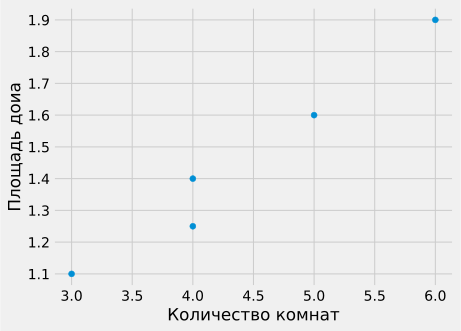

In [20]:
plt.scatter(houses[:, 0], houses[:, 1])
plt.xlabel('Количество комнат')
plt.ylabel('Площадь доиа')
plt.show()

По графику видно, что два признака сильно скоррелированы и их можно расположить вдоль одной прямой, то есть фактически сжать данные до одного измерения.

![Компьютер](PCA_1.png)

Это означает, что данные могут быть представлены одной главной компонентой с минимальной потерей информации.

**Алгоритм PCA**

In [21]:
houses

array([[5.  , 1.6 ],
       [4.  , 1.4 ],
       [6.  , 1.9 ],
       [3.  , 1.1 ],
       [4.  , 1.25]])

Можем не масштабировать данные так они различаются менее чем в 10 раз

Найдем среднее значение каждого признака

In [22]:
mean_values = np.mean(houses, axis=0)
mean_values

array([4.4 , 1.45])

Отнимем от значений признаков средние значения

In [23]:
houses_centred = houses - mean_values
houses_centred

array([[ 0.6 ,  0.15],
       [-0.4 , -0.05],
       [ 1.6 ,  0.45],
       [-1.4 , -0.35],
       [-0.4 , -0.2 ]])

Теперь среднее каждого признака равно 0

Найдем матрицу ковариаций

(матрица ковариаций - матрица, состоящая из попарных ковариаций признаков)

In [24]:
covarience_matrix = np.cov(houses_centred.T)
covarience_matrix

array([[1.3   , 0.35  ],
       [0.35  , 0.0975]])

In [25]:
# Проверка правильности найденной матрицы - найдем дисперсии центрированных признаков, они должны совпадать по значению с главной диагональю ковариационной матрицы
print(np.var(houses_centred[:, 0], ddof=1))
print(np.var(houses_centred[:, 1], ddof=1))

1.3
0.09749999999999998


Найдем собственные значения (eigenvalues) и собственные векторы (eigenvectors) матрицы ковариаций

In [26]:
eigenvalues, eigenvectors = np.linalg.eig(covarience_matrix)

In [27]:
eigenvalues

array([1.39445221, 0.00304779])

In [28]:
eigenvectors

array([[ 0.96546225, -0.26054298],
       [ 0.26054298,  0.96546225]])

Собственные значения (eigenvalues) сильно отличаются - eigenvalues[0] намного больше, чем eigenvalues[1], 

поэтому оставим только собственный вектор из столбца 0 массива eigenvectors, то есть eigenvectors[:, 0].

Умножим центрированные данные на этот вектор.

In [29]:
result_pre = np.dot(houses_centred, eigenvectors[:, 0])
result = result_pre.reshape(-1, 1)
result

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

Сравнение с результатом вычислений в библиотеке sklearn

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=1)

In [32]:
mc = pca.fit_transform(houses)
mc

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

In [33]:
pca.explained_variance_ratio_

array([0.99781911])

мы потеряем менее одного процента информации (< 10% можно считать нормой)

**Применение PCA в моделях машинного обучения**

Загрузим сохраненные нами данные по пассажирам Титаника

In [34]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [35]:
X_valid = pd.read_pickle('X_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 299 to 103
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         668 non-null    int64  
 1   Age         668 non-null    float64
 2   SibSp       668 non-null    int64  
 3   Parch       668 non-null    int64  
 4   Fare        668 non-null    float64
 5   Embarked_C  668 non-null    int64  
 6   Embarked_Q  668 non-null    int64  
 7   Embarked_S  668 non-null    int64  
 8   Pclass_1    668 non-null    int64  
 9   Pclass_2    668 non-null    int64  
 10  Pclass_3    668 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 62.6 KB


In [37]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_train.columns)

Сначала мы не будем указывать число компонент (по умолчанию все компоненты будут сохранены)

In [41]:
pca = PCA(random_state=100)

In [43]:
pca.fit(X_train_scaled)

PCA(random_state=100)

In [44]:
pca.explained_variance_ratio_

array([2.22480052e-01, 1.80579178e-01, 1.61196472e-01, 1.18874068e-01,
       9.43088132e-02, 7.61203186e-02, 6.30288483e-02, 4.72728880e-02,
       3.61393615e-02, 2.25074703e-16, 0.00000000e+00])

In [45]:
np.sum(pca.explained_variance_ratio_[:7])

np.float64(0.916587750440676)

Оставим только 7 главных компонент

In [46]:
pca = PCA(n_components=7, random_state=100)

In [47]:
X_train_mc = pca.fit_transform(X_train_scaled)

In [48]:
X_valid_mc = pca.transform(X_valid_scaled)

Построим модель логистической регрессии

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()

In [51]:
lr.fit(X_train_mc, y_train)

LogisticRegression()

In [52]:
y_pred = lr.predict(X_valid_mc)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_valid, y_pred)

0.8026905829596412